In [2]:
library(tidyverse)
library(broom)

── Attaching core tidyverse packages ──────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# Admission (2-Months)

In [3]:
raw_obs_adm <- read.csv2("../../DATA/new_table_obs_adm.csv", header = TRUE, sep = ";")
raw_obs_adm

ID,COVIDEO,CONDITION,IMC,AGE,SEX,INTERNAMENTO,UTI,ETNIA,EVENT,⋯,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,PCR
<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
29,29,NOBS,28.71,72.8,Masculino,Sim,Sim,Preta,Admissão,⋯,1,1,0,0,0,0,0,NA,3,5
85,85,NOBS,25.22,82.9,Feminino,Sim,Sim,Parda,Admissão,⋯,1,0,0,0,0,0,0,1,4,5
339,339,OBS,33.27,51.1,Feminino,Sim,Sim,Parda,Admissão,⋯,1,1,0,0,0,NA,NA,NA,6,61
397,397,NOBS,27.85,69.8,Feminino,Sim,Não,Preta,Admissão,⋯,1,0,0,0,0,0,0,0,2,5
447,447,NOBS,29.76,52.9,Masculino,Sim,Sim,Preta,Admissão,⋯,0,0,0,0,0,1,0,0,2,NA
642,642,OBS,30.39,57.6,Feminino,Sim,Sim,Preta,Admissão,⋯,1,1,0,0,0,NA,NA,NA,3,17
1048,1048,NOBS,28.52,51.6,Feminino,Não,NA,Parda,Admissão,⋯,1,0,1,0,0,1,1,0,6,NA
1525,1525,OBS,31.00,73.5,Masculino,Sim,Sim,Branca,Admissão,⋯,1,0,1,0,0,0,0,0,3,NA
1793,1793,NOBS,28.87,45.1,Masculino,Sim,Sim,Parda,Admissão,⋯,0,0,0,0,0,0,0,0,2,5


In [4]:
obs_adm <- raw_obs_adm %>%
  select(-c(ID,COVIDEO, IMC, SEVERITY, ETNIA, AGE, INTERNAMENTO, UTI, EVENT, EXPECT, PCR)) %>%
  na.omit() %>%
  mutate(
    NIVEIS = ifelse(N_SINTOMAS >= 5, ">=5", 
                    ifelse(N_SINTOMAS >=3 & N_SINTOMAS<=4, "3-4",
                    ifelse(N_SINTOMAS >=1 & N_SINTOMAS<=2, "1-2", "None")))
  )

head(obs_adm)

,CONDITION,SEX,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
2,NOBS,Feminino,0,1,1,0,1,0,0,0,0,0,0,1,4,3-4
4,NOBS,Feminino,0,0,1,0,1,0,0,0,0,0,0,0,2,1-2
5,NOBS,Masculino,0,0,1,0,0,0,0,0,0,1,0,0,2,1-2
7,NOBS,Feminino,0,1,1,0,1,0,1,0,0,1,1,0,6,>=5
8,OBS,Masculino,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4
9,NOBS,Masculino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2


In [5]:
rlog_obs <- obs_adm %>%
  mutate(
    GROUP = (paste(CONDITION, SEX, sep = "_")),
    OUT = ifelse(GROUP == "OBS_Feminino" | GROUP == "NOBS_Feminino", 1, 0),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5")))

In [6]:
head(rlog_obs)
str(rlog_obs)

,CONDITION,SEX,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<chr>,<dbl>
2,NOBS,Feminino,0,1,1,0,1,0,0,0,0,0,0,1,4,3-4,NOBS_Feminino,1
4,NOBS,Feminino,0,0,1,0,1,0,0,0,0,0,0,0,2,1-2,NOBS_Feminino,1
5,NOBS,Masculino,0,0,1,0,0,0,0,0,0,1,0,0,2,1-2,NOBS_Masculino,0
7,NOBS,Feminino,0,1,1,0,1,0,1,0,0,1,1,0,6,>=5,NOBS_Feminino,1
8,OBS,Masculino,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4,OBS_Masculino,0
9,NOBS,Masculino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,NOBS_Masculino,0


'data.frame':	395 obs. of  18 variables:
 $ CONDITION  : chr  "NOBS" "NOBS" "NOBS" "NOBS" ...
 $ SEX        : chr  "Feminino" "Feminino" "Masculino" "Feminino" ...
 $ CEFALEIA   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ TOSSE      : int  1 0 0 1 0 1 1 0 1 1 ...
 $ DISPNEIA   : int  1 1 1 1 1 1 1 0 1 1 ...
 $ DOR_CORPO  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ FADIGA     : int  1 1 0 1 1 0 0 1 0 1 ...
 $ DOR_TORAC  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ANOREXIA   : int  0 0 0 1 1 0 0 0 0 0 ...
 $ DISFAGIA   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ DISFONIA   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ALT_PALADAR: int  0 0 1 1 0 0 0 0 0 0 ...
 $ ALT_OLFATO : int  0 0 0 1 0 0 0 0 0 0 ...
 $ LIM_MOTORA : int  1 0 0 0 0 0 0 0 0 0 ...
 $ N_SINTOMAS : int  4 2 2 6 3 2 2 1 2 3 ...
 $ NIVEIS     : Factor w/ 4 levels "None","1-2","3-4",..: 3 2 2 4 3 2 2 2 2 3 ...
 $ GROUP      : chr  "NOBS_Feminino" "NOBS_Feminino" "NOBS_Masculino" "NOBS_Feminino" ...
 $ OUT        : num  1 1 0 1 0 0 0 0 1 0 ...
 - attr(*, "na.action")= 'omit' Na

In [7]:
rlog_obs %>%
  filter(CONDITION == "OBS") %>%
  mutate(
    GROUP = factor(paste(CONDITION, SEX, sep = "_"), levels = c("OBS_Masculino", "OBS_Feminino")),
    OUT = factor(ifelse(GROUP == "OBS_Feminino", 1, 0), levels = c(0,1)),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5")))
head(rlog_obs)

CONDITION,SEX,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS,GROUP,OUT
<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
OBS,Masculino,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4,OBS_Masculino,0
OBS,Masculino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,OBS_Masculino,0
OBS,Masculino,0,0,0,0,1,0,0,0,0,0,0,0,1,1-2,OBS_Masculino,0
OBS,Feminino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,OBS_Feminino,1
OBS,Masculino,0,1,0,0,0,0,0,0,0,0,0,0,1,1-2,OBS_Masculino,0
OBS,Feminino,0,1,1,0,1,1,0,0,0,0,0,0,5,>=5,OBS_Feminino,1
OBS,Feminino,0,1,0,0,0,0,0,0,0,0,0,0,1,1-2,OBS_Feminino,1
OBS,Masculino,0,1,1,0,1,1,0,0,0,1,1,0,6,>=5,OBS_Masculino,0
OBS,Feminino,1,0,1,1,1,1,0,0,0,0,0,1,6,>=5,OBS_Feminino,1


,CONDITION,SEX,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<chr>,<dbl>
2,NOBS,Feminino,0,1,1,0,1,0,0,0,0,0,0,1,4,3-4,NOBS_Feminino,1
4,NOBS,Feminino,0,0,1,0,1,0,0,0,0,0,0,0,2,1-2,NOBS_Feminino,1
5,NOBS,Masculino,0,0,1,0,0,0,0,0,0,1,0,0,2,1-2,NOBS_Masculino,0
7,NOBS,Feminino,0,1,1,0,1,0,1,0,0,1,1,0,6,>=5,NOBS_Feminino,1
8,OBS,Masculino,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4,OBS_Masculino,0
9,NOBS,Masculino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,NOBS_Masculino,0


In [8]:
model <- function(x) {
    glm(OUT ~ NIVEIS, data = filter(rlog_obs, CONDITION == x),
        family = binomial)
    }

In [9]:
model_obs <- model("OBS")
model_obs
summary(model_obs)


Call:  glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_obs, 
    CONDITION == x))

Coefficients:
(Intercept)    NIVEIS1-2    NIVEIS3-4    NIVEIS>=5  
    -0.6931       0.1431       0.9163       1.9076  

Degrees of Freedom: 174 Total (i.e. Null);  171 Residual
Null Deviance:	    236.3 
Residual Deviance: 211.7 	AIC: 219.7


Call:
glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_obs, 
    CONDITION == x))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  -0.6931     0.5477  -1.266  0.20569   
NIVEIS1-2     0.1431     0.6365   0.225  0.82211   
NIVEIS3-4     0.9163     0.6423   1.427  0.15368   
NIVEIS>=5     1.9076     0.6068   3.143  0.00167 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.34  on 174  degrees of freedom
Residual deviance: 211.71  on 171  degrees of freedom
AIC: 219.71

Number of Fisher Scoring iterations: 4


In [10]:
exp(-0.6931)

[1] 0.5000236

In [11]:
model_nobs <- model("NOBS")
model_nobs
summary(model_nobs)


Call:  glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_obs, 
    CONDITION == x))

Coefficients:
(Intercept)    NIVEIS1-2    NIVEIS3-4    NIVEIS>=5  
    -0.5878       0.2575       0.6809       1.2579  

Degrees of Freedom: 219 Total (i.e. Null);  216 Residual
Null Deviance:	    304.3 
Residual Deviance: 295.3 	AIC: 303.3


Call:
glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_obs, 
    CONDITION == x))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.5878     0.5578  -1.054   0.2920  
NIVEIS1-2     0.2575     0.6212   0.415   0.6784  
NIVEIS3-4     0.6809     0.5981   1.138   0.2550  
NIVEIS>=5     1.2579     0.6163   2.041   0.0412 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 304.33  on 219  degrees of freedom
Residual deviance: 295.25  on 216  degrees of freedom
AIC: 303.25

Number of Fisher Scoring iterations: 4


In [12]:
exp(1.25)

[1] 3.490343

In [13]:
extract_OR <- function(model) {
    tidy(model, conf.int = TRUE, exponentiate = TRUE) %>%
    filter(term != "(Intercept)")
    }

In [14]:
extract_OR(model_obs)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NIVEIS1-2,1.153846,0.6364967,0.2248257,0.822114846,0.3397558,4.288767
NIVEIS3-4,2.500000,0.6422615,1.4266629,0.153677077,0.7330114,9.437732
NIVEIS>=5,6.736842,0.6068413,3.1434763,0.001669539,2.1295773,23.957595


In [15]:
res_obs <- extract_OR(model_obs)
res_nobs <- extract_OR(model_nobs)

In [16]:
results <- bind_rows(res_nobs,res_obs) %>%
    mutate(
        term = gsub("NIVEIS", "Levels: ", term),
    Condition = rep(c("NOBS", "OBS"), each = 3),
    Timepoint = "Long COVID",
    Variable = "Symptoms Levels") %>%
    rename(OR = estimate, CI_low = conf.low, CI_high = conf.high)
head(results)

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Timepoint,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Levels: 1-2,1.293750,0.6211597,0.4146196,0.678420390,0.3924375,4.681626,NOBS,Long COVID,Symptoms Levels
Levels: 3-4,1.975610,0.5980999,1.1384002,0.254953410,0.6291190,6.880537,NOBS,Long COVID,Symptoms Levels
Levels: >=5,3.518182,0.6162965,2.0411349,0.041237423,1.0824457,12.665148,NOBS,Long COVID,Symptoms Levels
Levels: 1-2,1.153846,0.6364967,0.2248257,0.822114846,0.3397558,4.288767,OBS,Long COVID,Symptoms Levels
Levels: 3-4,2.500000,0.6422615,1.4266629,0.153677077,0.7330114,9.437732,OBS,Long COVID,Symptoms Levels
Levels: >=5,6.736842,0.6068413,3.1434763,0.001669539,2.1295773,23.957595,OBS,Long COVID,Symptoms Levels


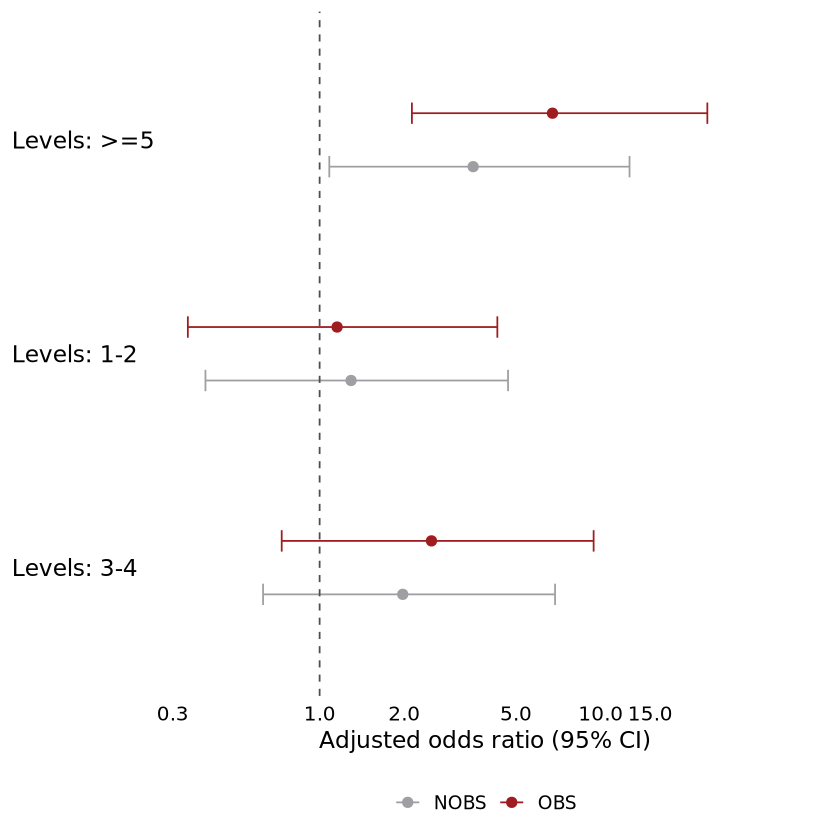

In [17]:
ggplot(results, aes(x = OR, y = fct_rev(term), color = Condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 2.5) +
  geom_errorbarh(aes(xmin = CI_low, xmax = CI_high),
                 position = position_dodge(width = 0.5),
                 height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray30") + 
  scale_x_log10(breaks = c(0.3, 1, 2, 5, 10, 15), limits = c(0.3, 50)) +
  scale_color_manual(values = c("OBS" = "#9F1C20", "NOBS" = "#9F9FA3")) +
  theme_minimal() +
  labs(
    x = "Adjusted odds ratio (95% CI)",
    y = NULL,
    color = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.y = element_text(size = 14, color = "black", hjust = 0),
    axis.text.x = element_text(size = 12, color = "black"),
    legend.position = "bottom",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank() 
  )

# Return (3-Months)

In [18]:
raw_obs_rtn <- read.csv2("../../DATA/new_table_obs_return.csv", header = TRUE, sep = ";")
head(raw_obs_rtn)

,ID,COVIDEO,CONDITION,IMC,AGE,SEX,ETNIA,EVENT,SEVERITY,CEFALEIA,⋯,ALT_OLFATO,ALT_PALADAR,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,N_SINTOMAS,SCORE_SAUDE,PCR
,<int>,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,29,29,NOBS,28.71,72.8,Masculino,Preta,Retorno 3 Meses,Grave,0,⋯,0,0,0,1,0,0,0,2,50,5
2,85,85,NOBS,25.22,82.9,Feminino,Parda,Retorno 3 Meses,Grave,NA,⋯,NA,NA,NA,NA,NA,NA,NA,0,NA,5
3,339,339,OBS,33.27,51.1,Feminino,Parda,Retorno 3 Meses,Grave,1,⋯,1,1,1,1,1,0,0,8,60,61
4,397,397,NOBS,27.85,69.8,Feminino,Preta,Retorno 3 Meses,Moderado,0,⋯,0,0,0,0,0,0,0,0,90,5
5,447,447,NOBS,29.76,52.9,Masculino,Preta,Retorno 3 Meses,Grave,1,⋯,0,0,1,1,0,0,0,4,100,NA
6,642,642,OBS,30.39,57.6,Feminino,Preta,Retorno 3 Meses,Grave,1,⋯,0,0,1,0,1,0,0,4,50,17


In [19]:
obs_rtn <- raw_obs_rtn %>%
  select(-c(ID,COVIDEO, IMC, AGE, SEVERITY, ETNIA, EVENT, SEVERITY, PCR, SCORE_SAUDE)) %>%
  na.omit() %>%
  mutate(
    NIVEIS = ifelse(N_SINTOMAS >= 5, ">=5", 
                    ifelse(N_SINTOMAS >=3 & N_SINTOMAS<=4, "3-4",
                    ifelse(N_SINTOMAS >=1 & N_SINTOMAS<=2, "1-2", "None")))
  )
head(obs_rtn)

,CONDITION,SEX,CEFALEIA,TOSSE,DOR_CORPO,DISPNEIA,ALT_OLFATO,ALT_PALADAR,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,N_SINTOMAS,NIVEIS
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,NOBS,Masculino,0,0,0,1,0,0,0,1,0,0,0,2,1-2
3,OBS,Feminino,1,1,1,0,1,1,1,1,1,0,0,8,>=5
4,NOBS,Feminino,0,0,0,0,0,0,0,0,0,0,0,0,None
5,NOBS,Masculino,1,0,1,0,0,0,1,1,0,0,0,4,3-4
6,OBS,Feminino,1,0,1,0,0,0,1,0,1,0,0,4,3-4
7,NOBS,Feminino,0,1,0,1,1,1,0,0,0,0,0,4,3-4


In [20]:
rlog_rtn <- obs_rtn %>%
  mutate(
    GROUP = (paste(CONDITION, SEX, sep = "_")),
    OUT = ifelse(GROUP == "OBS_Feminino" | GROUP == "NOBS_Feminino", 1, 0),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5")))

In [21]:
head(rlog_rtn)

,CONDITION,SEX,CEFALEIA,TOSSE,DOR_CORPO,DISPNEIA,ALT_OLFATO,ALT_PALADAR,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<chr>,<dbl>
1,NOBS,Masculino,0,0,0,1,0,0,0,1,0,0,0,2,1-2,NOBS_Masculino,0
3,OBS,Feminino,1,1,1,0,1,1,1,1,1,0,0,8,>=5,OBS_Feminino,1
4,NOBS,Feminino,0,0,0,0,0,0,0,0,0,0,0,0,None,NOBS_Feminino,1
5,NOBS,Masculino,1,0,1,0,0,0,1,1,0,0,0,4,3-4,NOBS_Masculino,0
6,OBS,Feminino,1,0,1,0,0,0,1,0,1,0,0,4,3-4,OBS_Feminino,1
7,NOBS,Feminino,0,1,0,1,1,1,0,0,0,0,0,4,3-4,NOBS_Feminino,1


In [22]:
model_rtn <- function(x) {
    glm(OUT ~ NIVEIS, data = filter(rlog_rtn, CONDITION == x),
        family = binomial)
    }

In [23]:
model_obs_rtn <- model_rtn("OBS")
model_obs_rtn
summary(model_obs_rtn)


Call:  glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_rtn, 
    CONDITION == x))

Coefficients:
(Intercept)    NIVEIS1-2    NIVEIS3-4    NIVEIS>=5  
     -1.281        1.281        3.440        2.434  

Degrees of Freedom: 114 Total (i.e. Null);  111 Residual
Null Deviance:	    154.8 
Residual Deviance: 123.6 	AIC: 131.6


Call:
glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_rtn, 
    CONDITION == x))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -1.2809     0.5055  -2.534 0.011281 *  
NIVEIS1-2     1.2809     0.6007   2.132 0.032968 *  
NIVEIS3-4     3.4404     0.7920   4.344  1.4e-05 ***
NIVEIS>=5     2.4336     0.6891   3.532 0.000413 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 154.79  on 114  degrees of freedom
Residual deviance: 123.61  on 111  degrees of freedom
AIC: 131.61

Number of Fisher Scoring iterations: 4


In [24]:
model_nobs_rtn <- model_rtn("NOBS")
model_nobs_rtn
summary(model_nobs_rtn)


Call:  glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_rtn, 
    CONDITION == x))

Coefficients:
(Intercept)    NIVEIS1-2    NIVEIS3-4    NIVEIS>=5  
    -0.4925       0.3791       1.4910       0.8109  

Degrees of Freedom: 126 Total (i.e. Null);  123 Residual
Null Deviance:	    175.9 
Residual Deviance: 168 	AIC: 176


Call:
glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_rtn, 
    CONDITION == x))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.4925     0.3827  -1.287   0.1982  
NIVEIS1-2     0.3791     0.4714   0.804   0.4212  
NIVEIS3-4     1.4910     0.5848   2.550   0.0108 *
NIVEIS>=5     0.8109     0.6020   1.347   0.1779  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 175.86  on 126  degrees of freedom
Residual deviance: 167.95  on 123  degrees of freedom
AIC: 175.95

Number of Fisher Scoring iterations: 4


In [25]:
extract_rtn_OR <- function(model_rtn) {
    tidy(model_rtn, conf.int = TRUE, exponentiate = TRUE) %>%
    filter(term != "(Intercept)")
    }

In [26]:
extract_rtn_OR(model_obs_rtn)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NIVEIS1-2,3.6,0.6006816,2.132467,3.296847e-02,1.166530,12.72957
NIVEIS3-4,31.2,0.7920275,4.343811,1.400319e-05,7.485421,176.96884
NIVEIS>=5,11.4,0.6890959,3.531603,4.130485e-04,3.167651,48.59308


In [27]:
extract_rtn_OR(model_nobs_rtn)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NIVEIS1-2,1.461039,0.4713586,0.8043723,0.42118199,0.5849690,3.755306
NIVEIS3-4,4.441558,0.5847675,2.5497403,0.01078032,1.4606195,14.730212
NIVEIS>=5,2.250000,0.6019749,1.3471164,0.17794274,0.7003072,7.559950


In [28]:
res_rtn_obs <- extract_OR(model_obs_rtn)
res_rtn_nobs <- extract_OR(model_nobs_rtn)

In [29]:
results_rtn <- bind_rows(res_rtn_nobs,res_rtn_obs) %>%
    mutate(
        term = gsub("NIVEIS", "Levels: ", term),
    Condition = rep(c("NOBS", "OBS"), each = 3),
    Timepoint = "Post-COVID",
    Variable = "Symptoms Levels") %>%
    rename(OR = estimate, CI_low = conf.low, CI_high = conf.high)
head(results_rtn)

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Timepoint,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Levels: 1-2,1.461039,0.4713586,0.8043723,4.211820e-01,0.5849690,3.755306,NOBS,Post-COVID,Symptoms Levels
Levels: 3-4,4.441558,0.5847675,2.5497403,1.078032e-02,1.4606195,14.730212,NOBS,Post-COVID,Symptoms Levels
Levels: >=5,2.250000,0.6019749,1.3471164,1.779427e-01,0.7003072,7.559950,NOBS,Post-COVID,Symptoms Levels
Levels: 1-2,3.600000,0.6006816,2.1324671,3.296847e-02,1.1665302,12.729565,OBS,Post-COVID,Symptoms Levels
Levels: 3-4,31.200000,0.7920275,4.3438112,1.400319e-05,7.4854208,176.968841,OBS,Post-COVID,Symptoms Levels
Levels: >=5,11.400000,0.6890959,3.5316033,4.130485e-04,3.1676509,48.593080,OBS,Post-COVID,Symptoms Levels


In [30]:
head(results)

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Timepoint,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Levels: 1-2,1.293750,0.6211597,0.4146196,0.678420390,0.3924375,4.681626,NOBS,Long COVID,Symptoms Levels
Levels: 3-4,1.975610,0.5980999,1.1384002,0.254953410,0.6291190,6.880537,NOBS,Long COVID,Symptoms Levels
Levels: >=5,3.518182,0.6162965,2.0411349,0.041237423,1.0824457,12.665148,NOBS,Long COVID,Symptoms Levels
Levels: 1-2,1.153846,0.6364967,0.2248257,0.822114846,0.3397558,4.288767,OBS,Long COVID,Symptoms Levels
Levels: 3-4,2.500000,0.6422615,1.4266629,0.153677077,0.7330114,9.437732,OBS,Long COVID,Symptoms Levels
Levels: >=5,6.736842,0.6068413,3.1434763,0.001669539,2.1295773,23.957595,OBS,Long COVID,Symptoms Levels


In [31]:
head(results_rtn)

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Timepoint,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Levels: 1-2,1.461039,0.4713586,0.8043723,4.211820e-01,0.5849690,3.755306,NOBS,Post-COVID,Symptoms Levels
Levels: 3-4,4.441558,0.5847675,2.5497403,1.078032e-02,1.4606195,14.730212,NOBS,Post-COVID,Symptoms Levels
Levels: >=5,2.250000,0.6019749,1.3471164,1.779427e-01,0.7003072,7.559950,NOBS,Post-COVID,Symptoms Levels
Levels: 1-2,3.600000,0.6006816,2.1324671,3.296847e-02,1.1665302,12.729565,OBS,Post-COVID,Symptoms Levels
Levels: 3-4,31.200000,0.7920275,4.3438112,1.400319e-05,7.4854208,176.968841,OBS,Post-COVID,Symptoms Levels
Levels: >=5,11.400000,0.6890959,3.5316033,4.130485e-04,3.1676509,48.593080,OBS,Post-COVID,Symptoms Levels


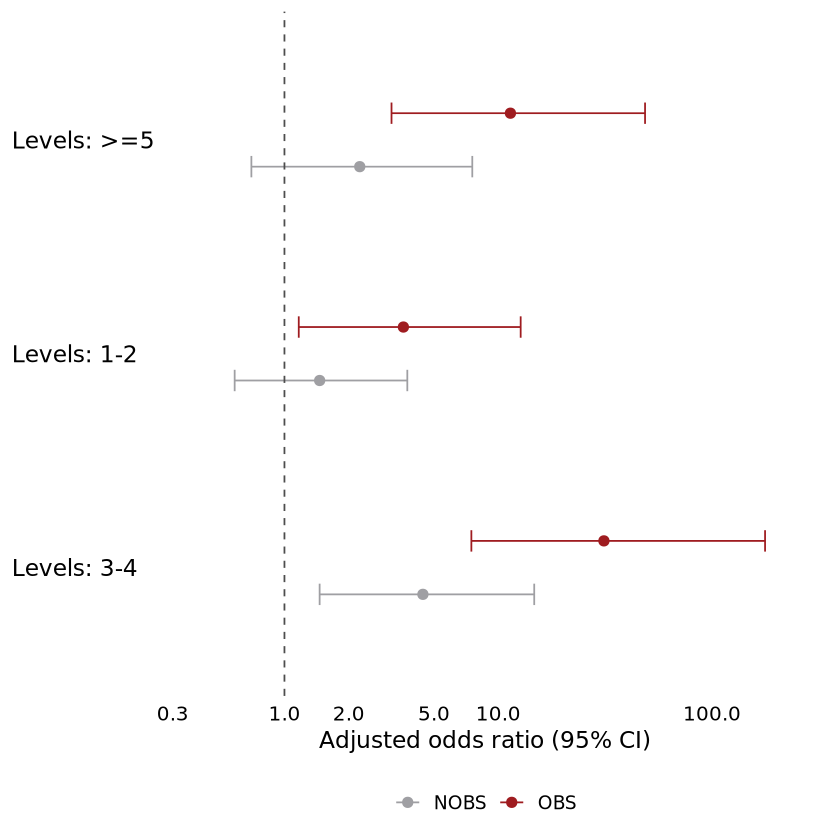

In [32]:
ggplot(results_rtn, aes(x = OR, y = fct_rev(term), color = Condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 2.5) +
  geom_errorbarh(aes(xmin = CI_low, xmax = CI_high),
                 position = position_dodge(width = 0.5),
                 height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray30") + 
  scale_x_log10(breaks = c(0.3, 1, 2, 5, 10, 100), limits = c(0.3, 250)) +
  scale_color_manual(values = c("OBS" = "#9F1C20", "NOBS" = "#9F9FA3")) +
  theme_minimal() +
  labs(
    x = "Adjusted odds ratio (95% CI)",
    y = NULL,
    color = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.y = element_text(size = 14, color = "black", hjust = 0),
    axis.text.x = element_text(size = 12, color = "black"),
    legend.position = "bottom",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank() 
  )

In [33]:
all_results <- bind_rows(results, results_rtn)
all_results

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Timepoint,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Levels: 1-2,1.293750,0.6211597,0.4146196,6.784204e-01,0.3924375,4.681626,NOBS,Long COVID,Symptoms Levels
Levels: 3-4,1.975610,0.5980999,1.1384002,2.549534e-01,0.6291190,6.880537,NOBS,Long COVID,Symptoms Levels
Levels: >=5,3.518182,0.6162965,2.0411349,4.123742e-02,1.0824457,12.665148,NOBS,Long COVID,Symptoms Levels
Levels: 1-2,1.153846,0.6364967,0.2248257,8.221148e-01,0.3397558,4.288767,OBS,Long COVID,Symptoms Levels
Levels: 3-4,2.500000,0.6422615,1.4266629,1.536771e-01,0.7330114,9.437732,OBS,Long COVID,Symptoms Levels
Levels: >=5,6.736842,0.6068413,3.1434763,1.669539e-03,2.1295773,23.957595,OBS,Long COVID,Symptoms Levels
Levels: 1-2,1.461039,0.4713586,0.8043723,4.211820e-01,0.5849690,3.755306,NOBS,Post-COVID,Symptoms Levels
Levels: 3-4,4.441558,0.5847675,2.5497403,1.078032e-02,1.4606195,14.730212,NOBS,Post-COVID,Symptoms Levels
Levels: >=5,2.250000,0.6019749,1.3471164,1.779427e-01,0.7003072,7.559950,NOBS,Post-COVID,Symptoms Levels


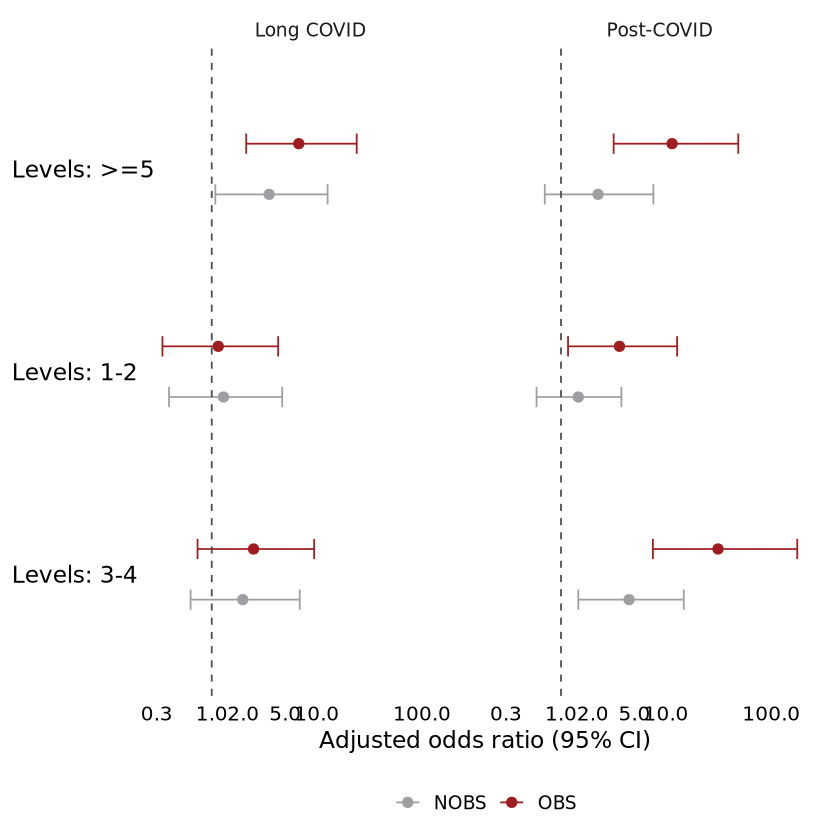

In [34]:
# Forest plot com facet por Timepoint
ggplot(all_results, aes(x = OR, y = fct_rev(term), color = Condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 2.5) +
  geom_errorbarh(aes(xmin = CI_low, xmax = CI_high),
                 position = position_dodge(width = 0.5),
                 height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray30") +
  scale_x_log10(breaks = c(0.3, 1, 2, 5, 10, 100), limits = c(0.3, 250)) +
  scale_color_manual(values = c("OBS" = "#9F1C20", "NOBS" = "#9F9FA3")) +
  theme_minimal(base_size = 14) +
  labs(
    x = "Adjusted odds ratio (95% CI)",
    y = NULL,
    color = NULL
  ) +
  theme(
    axis.text.y = element_text(size = 14, color = "black", hjust = 0),
    axis.text.x = element_text(size = 12, color = "black"),
    legend.position = "bottom",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank()
  ) +
  facet_grid(~ Timepoint)

In [35]:
rlog_nobs_rtn <- obs_rtn %>%
  filter(CONDITION == "NOBS") %>%
  mutate(
    NOBS = factor(paste(CONDITION, SEX, sep = "_"), levels = c("NOBS_Masculino", "NOBS_Feminino")),
    NIVEIS = factor(NIVEIS)) %>%  
  select(NOBS, NIVEIS) 
head(rlog_nobs_rtn)

,NOBS,NIVEIS
,<fct>,<fct>
1,NOBS_Masculino,1-2
2,NOBS_Feminino,None
3,NOBS_Masculino,3-4
4,NOBS_Feminino,3-4
5,NOBS_Masculino,None
6,NOBS_Masculino,1-2


### Add baseline

In [36]:
# Add"None" information
baseline <- all_results %>%
  distinct(Timepoint, Condition, Variable) %>% 
  mutate(
    term = "None",
    OR = 1,
    std.error = NA,
    statistic = NA,
    p.value = NA,
    CI_low = 1,
    CI_high = 1
  )

# Junta baseline com os resultados
all_results_plot <- bind_rows(all_results, baseline)

In [37]:
all_results_plot <- all_results_plot %>%
  mutate(
    term = factor(term, levels = c("None", "Levels: 1-2", "Levels: 3-4", "Levels: >=5"))
  )

In [38]:
all_results_plot

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Timepoint,Variable
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Levels: 1-2,1.293750,0.6211597,0.4146196,6.784204e-01,0.3924375,4.681626,NOBS,Long COVID,Symptoms Levels
Levels: 3-4,1.975610,0.5980999,1.1384002,2.549534e-01,0.6291190,6.880537,NOBS,Long COVID,Symptoms Levels
Levels: >=5,3.518182,0.6162965,2.0411349,4.123742e-02,1.0824457,12.665148,NOBS,Long COVID,Symptoms Levels
Levels: 1-2,1.153846,0.6364967,0.2248257,8.221148e-01,0.3397558,4.288767,OBS,Long COVID,Symptoms Levels
Levels: 3-4,2.500000,0.6422615,1.4266629,1.536771e-01,0.7330114,9.437732,OBS,Long COVID,Symptoms Levels
Levels: >=5,6.736842,0.6068413,3.1434763,1.669539e-03,2.1295773,23.957595,OBS,Long COVID,Symptoms Levels
Levels: 1-2,1.461039,0.4713586,0.8043723,4.211820e-01,0.5849690,3.755306,NOBS,Post-COVID,Symptoms Levels
Levels: 3-4,4.441558,0.5847675,2.5497403,1.078032e-02,1.4606195,14.730212,NOBS,Post-COVID,Symptoms Levels
Levels: >=5,2.250000,0.6019749,1.3471164,1.779427e-01,0.7003072,7.559950,NOBS,Post-COVID,Symptoms Levels


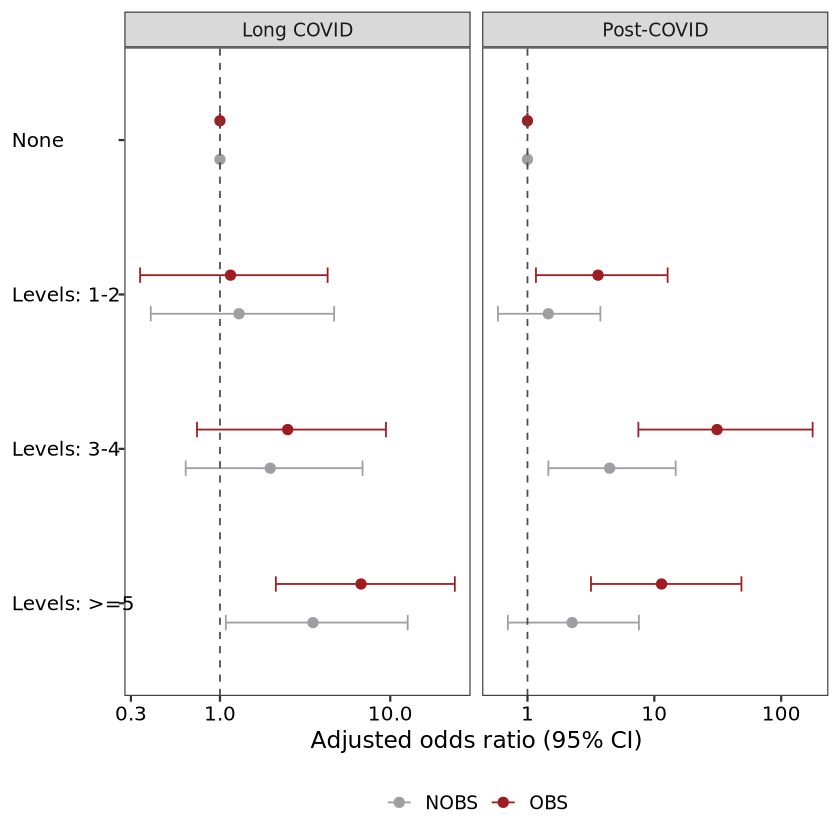

In [39]:
ggplot(all_results_plot, aes(x = OR, y = fct_rev(term), color = Condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 2.5) +
  geom_errorbarh(aes(xmin = CI_low, xmax = CI_high),
                 position = position_dodge(width = 0.5),
                 height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray30") + 
  scale_x_log10(breaks = c(0.3, 1, 10, 100)) +
  scale_color_manual(values = c("OBS" = "#9F1C20", "NOBS" = "#9F9FA3")) +
  theme_bw(base_size = 14) +
  labs(
    x = "Adjusted odds ratio (95% CI)",
    y = NULL,
    color = NULL
  ) +
  theme(
    axis.text.y = element_text(size = 12, color = "black", hjust = 0),
    axis.text.x = element_text(size = 12, color = "black"),
    legend.position = "bottom",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
#    strip.background = element_rect(fill = "grey90",color = "grey90",linewidth = 0.8),
#  strip.text = element_text(size = 14,color = "black")
  ) +
  facet_wrap(~ Timepoint, scales = "free_x")
ggsave("combinedForestPlot_femaleVsmale.tiff", width = 8, height = 7, dpi = 300)

## Female vs. Female (2-Months)

In [65]:
rlog_fem_adm <- rlog_obs %>%
  filter(SEX == "Feminino") %>%
  mutate(
    GROUP = factor(paste(CONDITION, SEX, sep = "_"), levels = c("NOBS_Feminino", "OBS_Feminino")),
    OUT = factor(ifelse(GROUP == "OBS_Feminino", 1, 0), levels = c(0,1)),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5"))) 

In [47]:
head(rlog_fem_adm)

,CONDITION,SEX,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,NOBS,Feminino,0,1,1,0,1,0,0,0,0,0,0,1,4,3-4,NOBS_Feminino,0
2,NOBS,Feminino,0,0,1,0,1,0,0,0,0,0,0,0,2,1-2,NOBS_Feminino,0
3,NOBS,Feminino,0,1,1,0,1,0,1,0,0,1,1,0,6,>=5,NOBS_Feminino,0
4,OBS,Feminino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,OBS_Feminino,1
5,NOBS,Feminino,0,0,0,0,1,0,0,0,0,0,0,0,1,1-2,NOBS_Feminino,0
6,NOBS,Feminino,0,0,1,0,1,0,0,0,0,0,0,1,3,3-4,NOBS_Feminino,0


In [51]:
summary(glm(OUT ~ NIVEIS, data = rlog_fem_adm, family = "binomial"))


Call:
glm(formula = OUT ~ NIVEIS, family = "binomial", data = rlog_fem_adm)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.541e-16  6.325e-01   0.000    1.000
NIVEIS1-2   -4.274e-01  7.142e-01  -0.598    0.550
NIVEIS3-4   -8.109e-01  6.872e-01  -1.180    0.238
NIVEIS>=5    3.977e-01  6.625e-01   0.600    0.548

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 304.33  on 219  degrees of freedom
Residual deviance: 289.27  on 216  degrees of freedom
AIC: 297.27

Number of Fisher Scoring iterations: 4


## Men vs. Men (2-Months)

In [66]:
rlog_male_adm <- rlog_obs %>%
  filter(SEX == "Masculino") %>%
  mutate(
    GROUP = factor(paste(CONDITION, SEX, sep = "_"), levels = c("NOBS_Masculino", "OBS_Masculino")),
    OUT = factor(ifelse(GROUP == "OBS_Masculino", 1, 0), levels = c(0,1)),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5"))) 

In [68]:
head(rlog_male_adm)

,CONDITION,SEX,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,NOBS,Masculino,0,0,1,0,0,0,0,0,0,1,0,0,2,1-2,NOBS_Masculino,0
2,OBS,Masculino,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4,OBS_Masculino,1
3,NOBS,Masculino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,NOBS_Masculino,0
4,OBS,Masculino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,OBS_Masculino,1
5,OBS,Masculino,0,0,0,0,1,0,0,0,0,0,0,0,1,1-2,OBS_Masculino,1
6,NOBS,Masculino,0,1,1,0,1,0,0,0,0,0,0,0,3,3-4,NOBS_Masculino,0


In [67]:
summary(glm(OUT ~ NIVEIS, data = rlog_male_adm, family = "binomial"))


Call:
glm(formula = OUT ~ NIVEIS, family = "binomial", data = rlog_male_adm)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.1054     0.4595   0.229   0.8186  
NIVEIS1-2    -0.3130     0.5299  -0.591   0.5548  
NIVEIS3-4    -1.0463     0.5459  -1.917   0.0553 .
NIVEIS>=5    -0.2520     0.5561  -0.453   0.6505  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.34  on 174  degrees of freedom
Residual deviance: 230.36  on 171  degrees of freedom
AIC: 238.36

Number of Fisher Scoring iterations: 4


In [88]:
rlog_obs %>%
  mutate(
    GROUP = factor(paste(CONDITION, SEX, sep = "_")),
    OUT = factor(ifelse(GROUP == "OBS_Feminino" | GROUP == "NOBS_Feminino", 1, 0), levels = c(0,1)),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5"))) 

,CONDITION,SEX,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
2,NOBS,Feminino,0,1,1,0,1,0,0,0,0,0,0,1,4,3-4,NOBS_Feminino,1
4,NOBS,Feminino,0,0,1,0,1,0,0,0,0,0,0,0,2,1-2,NOBS_Feminino,1
5,NOBS,Masculino,0,0,1,0,0,0,0,0,0,1,0,0,2,1-2,NOBS_Masculino,0
7,NOBS,Feminino,0,1,1,0,1,0,1,0,0,1,1,0,6,>=5,NOBS_Feminino,1
8,OBS,Masculino,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4,OBS_Masculino,0
9,NOBS,Masculino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,NOBS_Masculino,0


In [93]:
rlog_sex_adm <- rlog_obs %>%
  mutate(
    GROUP = factor(paste(CONDITION, SEX, sep = "_")),
    OUT = factor(ifelse(GROUP == "OBS_Feminino", 1, 0), levels = c(0,1)),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5")))
head(rlog_sex_adm, 15)

,CONDITION,SEX,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
2,NOBS,Feminino,0,1,1,0,1,0,0,0,0,0,0,1,4,3-4,NOBS_Feminino,0
4,NOBS,Feminino,0,0,1,0,1,0,0,0,0,0,0,0,2,1-2,NOBS_Feminino,0
5,NOBS,Masculino,0,0,1,0,0,0,0,0,0,1,0,0,2,1-2,NOBS_Masculino,0
7,NOBS,Feminino,0,1,1,0,1,0,1,0,0,1,1,0,6,>=5,NOBS_Feminino,0
8,OBS,Masculino,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4,OBS_Masculino,0
9,NOBS,Masculino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,NOBS_Masculino,0
10,OBS,Masculino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,OBS_Masculino,0
14,OBS,Masculino,0,0,0,0,1,0,0,0,0,0,0,0,1,1-2,OBS_Masculino,0
16,OBS,Feminino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,OBS_Feminino,1


In [94]:
modelSex_adm <- function(x) {
    glm(OUT ~ NIVEIS, data = filter(rlog_sex_adm, SEX == x),
        family = binomial)
    }

In [95]:
model_female_adm <- modelSex_adm("Feminino")
summary(model_female_adm)


Call:
glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_sex_adm, 
    SEX == x))

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -2.541e-16  6.325e-01   0.000    1.000
NIVEIS1-2   -4.274e-01  7.142e-01  -0.598    0.550
NIVEIS3-4   -8.109e-01  6.872e-01  -1.180    0.238
NIVEIS>=5    3.977e-01  6.625e-01   0.600    0.548

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 304.33  on 219  degrees of freedom
Residual deviance: 289.27  on 216  degrees of freedom
AIC: 297.27

Number of Fisher Scoring iterations: 4


In [98]:
rlog_sex_adm <- rlog_obs %>%
  mutate(
    GROUP = factor(paste(CONDITION, SEX, sep = "_")),
    OUT = factor(ifelse(GROUP == "OBS_Masculino", 1, 0), levels = c(0,1)),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5")))
head(rlog_sex_adm)

,CONDITION,SEX,CEFALEIA,TOSSE,DISPNEIA,DOR_CORPO,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,ALT_PALADAR,ALT_OLFATO,LIM_MOTORA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
2,NOBS,Feminino,0,1,1,0,1,0,0,0,0,0,0,1,4,3-4,NOBS_Feminino,0
4,NOBS,Feminino,0,0,1,0,1,0,0,0,0,0,0,0,2,1-2,NOBS_Feminino,0
5,NOBS,Masculino,0,0,1,0,0,0,0,0,0,1,0,0,2,1-2,NOBS_Masculino,0
7,NOBS,Feminino,0,1,1,0,1,0,1,0,0,1,1,0,6,>=5,NOBS_Feminino,0
8,OBS,Masculino,0,0,1,0,1,0,1,0,0,0,0,0,3,3-4,OBS_Masculino,1
9,NOBS,Masculino,0,1,1,0,0,0,0,0,0,0,0,0,2,1-2,NOBS_Masculino,0


In [99]:
model_male_adm <- modelSex_adm("Masculino")
summary(model_male_adm)


Call:
glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_sex_adm, 
    SEX == x))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)   0.1054     0.4595   0.229   0.8186  
NIVEIS1-2    -0.3130     0.5299  -0.591   0.5548  
NIVEIS3-4    -1.0463     0.5459  -1.917   0.0553 .
NIVEIS>=5    -0.2520     0.5561  -0.453   0.6505  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 236.34  on 174  degrees of freedom
Residual deviance: 230.36  on 171  degrees of freedom
AIC: 238.36

Number of Fisher Scoring iterations: 4


In [101]:
res_female_adm <- extract_OR(model_female_adm)
res_male_adm <- extract_OR(model_male_adm)

res_female_adm
res_male_adm

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NIVEIS1-2,0.6521739,0.7142443,-0.5984563,0.5495355,0.1557856,2.714613
NIVEIS3-4,0.4444444,0.6871842,-1.1800769,0.2379696,0.1116682,1.760523
NIVEIS>=5,1.4883721,0.6624808,0.6002936,0.5483106,0.3923026,5.650962


term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NIVEIS1-2,0.7312500,0.5299270,-0.5906471,0.55475687,0.2544273,2.074051
NIVEIS3-4,0.3512195,0.5458949,-1.9167497,0.05526974,0.1178478,1.021816
NIVEIS>=5,0.7772727,0.5560551,-0.4531278,0.65045674,0.2572113,2.318863


In [105]:
results_sex <- bind_rows(res_female_adm,res_male_adm) %>%
    mutate(
        term = gsub("NIVEIS", "Levels: ", term),
    Condition = rep(c("Women", "Men"), each = 3),
    Timepoint = "Long COVID",
    Variable = "Symptoms Levels") %>%
    rename(OR = estimate, CI_low = conf.low, CI_high = conf.high)
head(results_sex)

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Timepoint,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Levels: 1-2,0.6521739,0.7142443,-0.5984563,0.54953550,0.1557856,2.714613,Women,Long COVID,Symptoms Levels
Levels: 3-4,0.4444444,0.6871842,-1.1800769,0.23796964,0.1116682,1.760523,Women,Long COVID,Symptoms Levels
Levels: >=5,1.4883721,0.6624808,0.6002936,0.54831060,0.3923026,5.650962,Women,Long COVID,Symptoms Levels
Levels: 1-2,0.7312500,0.5299270,-0.5906471,0.55475687,0.2544273,2.074051,Men,Long COVID,Symptoms Levels
Levels: 3-4,0.3512195,0.5458949,-1.9167497,0.05526974,0.1178478,1.021816,Men,Long COVID,Symptoms Levels
Levels: >=5,0.7772727,0.5560551,-0.4531278,0.65045674,0.2572113,2.318863,Men,Long COVID,Symptoms Levels


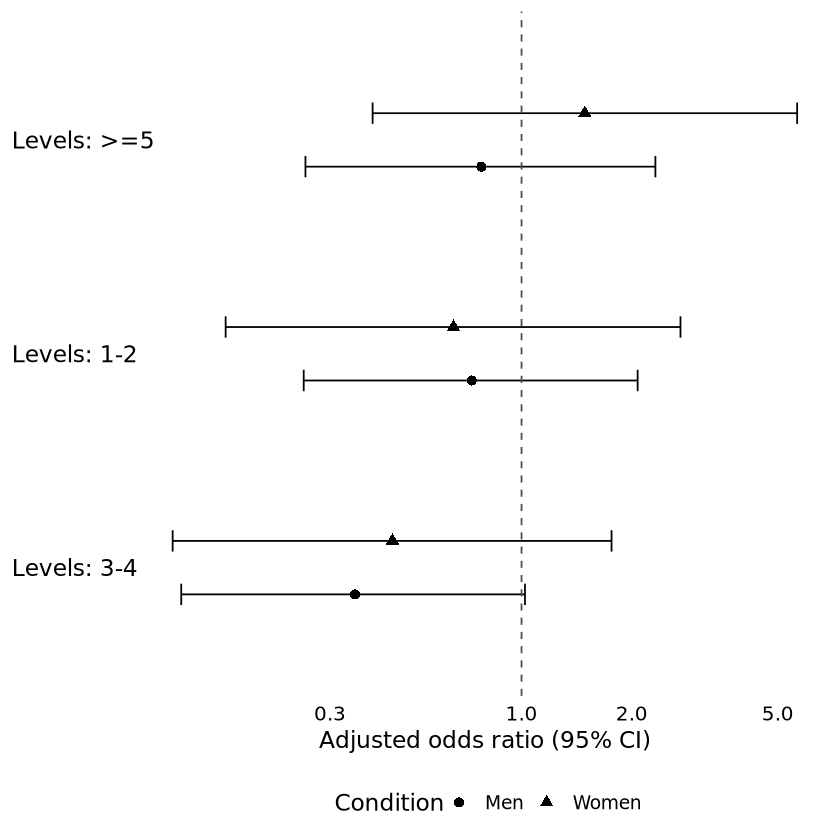

In [117]:
ggplot(results_sex, aes(x = OR, y = fct_rev(term), shape = Condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 2.5, color = "black") +
  geom_errorbarh(aes(xmin = CI_low, xmax = CI_high),
                 position = position_dodge(width = 0.5),
                 height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray30") + 
  scale_x_log10(breaks = c(0.3, 1, 2, 5, 10, 100)) +
  theme_minimal() +
  labs(
    x = "Adjusted odds ratio (95% CI)",
    y = NULL,
    color = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.y = element_text(size = 14, color = "black", hjust = 0),
    axis.text.x = element_text(size = 12, color = "black"),
    legend.position = "bottom",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank() 
  )

In [122]:
rlog_sex_rtn <- rlog_rtn %>%
  mutate(
    GROUP = factor(paste(CONDITION, SEX, sep = "_")),
    OUT = factor(ifelse(GROUP == "OBS_Masculino", 1, 0), levels = c(0,1)),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5")))
head(rlog_sex_rtn)

,CONDITION,SEX,CEFALEIA,TOSSE,DOR_CORPO,DISPNEIA,ALT_OLFATO,ALT_PALADAR,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,NOBS,Masculino,0,0,0,1,0,0,0,1,0,0,0,2,1-2,NOBS_Masculino,0
3,OBS,Feminino,1,1,1,0,1,1,1,1,1,0,0,8,>=5,OBS_Feminino,0
4,NOBS,Feminino,0,0,0,0,0,0,0,0,0,0,0,0,None,NOBS_Feminino,0
5,NOBS,Masculino,1,0,1,0,0,0,1,1,0,0,0,4,3-4,NOBS_Masculino,0
6,OBS,Feminino,1,0,1,0,0,0,1,0,1,0,0,4,3-4,OBS_Feminino,0
7,NOBS,Feminino,0,1,0,1,1,1,0,0,0,0,0,4,3-4,NOBS_Feminino,0


In [123]:
modelSex_adm <- function(x) {
    glm(OUT ~ NIVEIS, data = filter(rlog_sex_rtn, SEX == x),
        family = binomial)
    }

In [121]:
model_female_rtn <- modelSex_adm("Feminino")
summary(model_female_rtn)


Call:
glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_sex_rtn, 
    SEX == x))

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.7885     0.5394  -1.462   0.1438  
NIVEIS1-2     0.5140     0.6193   0.830   0.4065  
NIVEIS3-4     1.1021     0.6181   1.783   0.0746 .
NIVEIS>=5     1.3350     0.6591   2.025   0.0428 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 187.08  on 134  degrees of freedom
Residual deviance: 180.77  on 131  degrees of freedom
AIC: 188.77

Number of Fisher Scoring iterations: 4


In [124]:
model_male_rtn <- modelSex_adm("Masculino")
summary(model_male_rtn)


Call:
glm(formula = OUT ~ NIVEIS, family = binomial, data = filter(rlog_sex_rtn, 
    SEX == x))

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -1.297e-16  3.333e-01   0.000    1.000
NIVEIS1-2   -3.878e-01  4.466e-01  -0.868    0.385
NIVEIS3-4   -8.473e-01  7.664e-01  -1.106    0.269
NIVEIS>=5   -2.877e-01  6.346e-01  -0.453    0.650

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.22  on 106  degrees of freedom
Residual deviance: 144.67  on 103  degrees of freedom
AIC: 152.67

Number of Fisher Scoring iterations: 4


In [125]:
res_female_rtn <- extract_OR(model_female_rtn)
res_male_rtn <- extract_OR(model_male_rtn)

res_female_rtn
res_male_rtn

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NIVEIS1-2,1.672000,0.6193064,0.8299938,0.40654228,0.5136942,6.05649
NIVEIS3-4,3.010526,0.6180631,1.7831754,0.07455776,0.9315958,10.91648
NIVEIS>=5,3.800000,0.6591279,2.0254053,0.04282576,1.0863950,14.88376


term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NIVEIS1-2,0.6785714,0.4466061,-0.8682496,0.3852577,0.28037472,1.626630
NIVEIS3-4,0.4285714,0.7663557,-1.1056195,0.2688912,0.08211508,1.810468
NIVEIS>=5,0.7500000,0.6346478,-0.4532941,0.6503370,0.20834769,2.592932


In [126]:
results_sex_rtn <- bind_rows(res_female_rtn, res_male_rtn) %>%
    mutate(
        term = gsub("NIVEIS", "Levels: ", term),
    Condition = rep(c("Women", "Men"), each = 3),
    Timepoint = "Post-COVID",
    Variable = "Symptoms Levels") %>%
    rename(OR = estimate, CI_low = conf.low, CI_high = conf.high)
head(results_sex_rtn)

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Timepoint,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Levels: 1-2,1.6720000,0.6193064,0.8299938,0.40654228,0.51369424,6.056490,Women,Post-COVID,Symptoms Levels
Levels: 3-4,3.0105263,0.6180631,1.7831754,0.07455776,0.93159577,10.916485,Women,Post-COVID,Symptoms Levels
Levels: >=5,3.8000000,0.6591279,2.0254053,0.04282576,1.08639500,14.883757,Women,Post-COVID,Symptoms Levels
Levels: 1-2,0.6785714,0.4466061,-0.8682496,0.38525771,0.28037472,1.626630,Men,Post-COVID,Symptoms Levels
Levels: 3-4,0.4285714,0.7663557,-1.1056195,0.26889124,0.08211508,1.810468,Men,Post-COVID,Symptoms Levels
Levels: >=5,0.7500000,0.6346478,-0.4532941,0.65033699,0.20834769,2.592932,Men,Post-COVID,Symptoms Levels


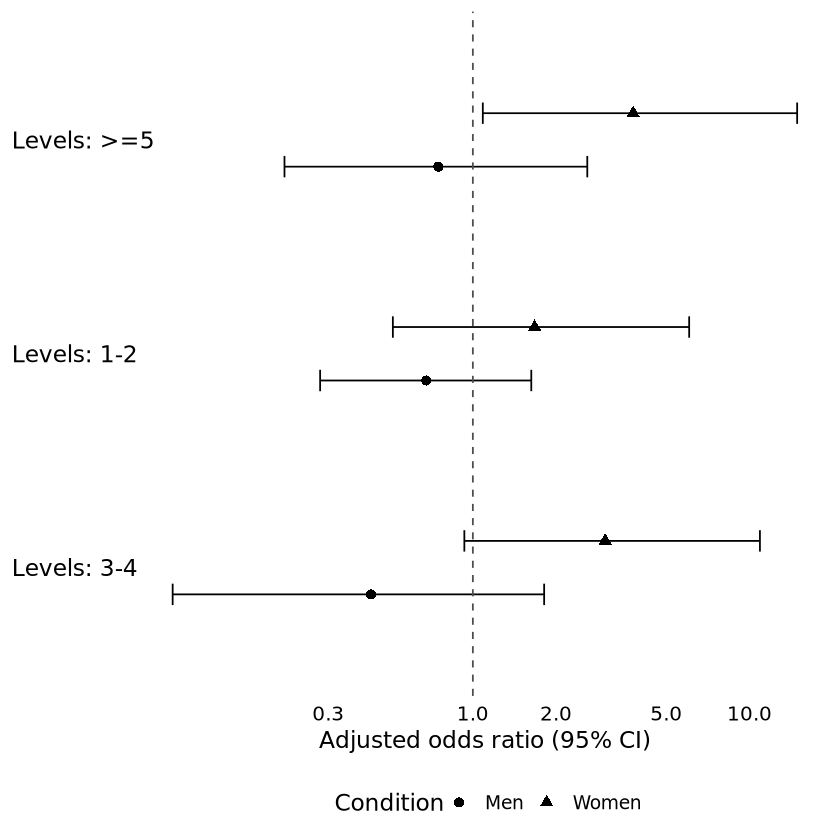

In [127]:
ggplot(results_sex_rtn, aes(x = OR, y = fct_rev(term), shape = Condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 2.5, color = "black") +
  geom_errorbarh(aes(xmin = CI_low, xmax = CI_high),
                 position = position_dodge(width = 0.5),
                 height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray30") + 
  scale_x_log10(breaks = c(0.3, 1, 2, 5, 10, 100)) +
  theme_minimal() +
  labs(
    x = "Adjusted odds ratio (95% CI)",
    y = NULL,
    color = NULL
  ) +
  theme_minimal(base_size = 14) +
  theme(
    axis.text.y = element_text(size = 14, color = "black", hjust = 0),
    axis.text.x = element_text(size = 12, color = "black"),
    legend.position = "bottom",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank() 
  )

In [128]:
all_sex_results <- bind_rows(results_sex, results_sex_rtn)
all_sex_results

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Timepoint,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Levels: 1-2,0.6521739,0.7142443,-0.5984563,0.54953550,0.15578563,2.714613,Women,Long COVID,Symptoms Levels
Levels: 3-4,0.4444444,0.6871842,-1.1800769,0.23796964,0.11166822,1.760523,Women,Long COVID,Symptoms Levels
Levels: >=5,1.4883721,0.6624808,0.6002936,0.54831060,0.39230260,5.650962,Women,Long COVID,Symptoms Levels
Levels: 1-2,0.7312500,0.5299270,-0.5906471,0.55475687,0.25442727,2.074051,Men,Long COVID,Symptoms Levels
Levels: 3-4,0.3512195,0.5458949,-1.9167497,0.05526974,0.11784779,1.021816,Men,Long COVID,Symptoms Levels
Levels: >=5,0.7772727,0.5560551,-0.4531278,0.65045674,0.25721131,2.318863,Men,Long COVID,Symptoms Levels
Levels: 1-2,1.6720000,0.6193064,0.8299938,0.40654228,0.51369424,6.056490,Women,Post-COVID,Symptoms Levels
Levels: 3-4,3.0105263,0.6180631,1.7831754,0.07455776,0.93159577,10.916485,Women,Post-COVID,Symptoms Levels
Levels: >=5,3.8000000,0.6591279,2.0254053,0.04282576,1.08639500,14.883757,Women,Post-COVID,Symptoms Levels


In [129]:
# Add baseline information
baseline_sex <- all_sex_results %>%
  distinct(Timepoint, Condition, Variable) %>% 
  mutate(
    term = "None",
    OR = 1,
    std.error = NA,
    statistic = NA,
    p.value = NA,
    CI_low = 1,
    CI_high = 1
  )

# Junta baseline com os resultados
all_sex_results_plot <- bind_rows(all_sex_results, baseline_sex)

In [130]:
all_sex_results_plot

term,OR,std.error,statistic,p.value,CI_low,CI_high,Condition,Timepoint,Variable
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
Levels: 1-2,0.6521739,0.7142443,-0.5984563,0.54953550,0.15578563,2.714613,Women,Long COVID,Symptoms Levels
Levels: 3-4,0.4444444,0.6871842,-1.1800769,0.23796964,0.11166822,1.760523,Women,Long COVID,Symptoms Levels
Levels: >=5,1.4883721,0.6624808,0.6002936,0.54831060,0.39230260,5.650962,Women,Long COVID,Symptoms Levels
Levels: 1-2,0.7312500,0.5299270,-0.5906471,0.55475687,0.25442727,2.074051,Men,Long COVID,Symptoms Levels
Levels: 3-4,0.3512195,0.5458949,-1.9167497,0.05526974,0.11784779,1.021816,Men,Long COVID,Symptoms Levels
Levels: >=5,0.7772727,0.5560551,-0.4531278,0.65045674,0.25721131,2.318863,Men,Long COVID,Symptoms Levels
Levels: 1-2,1.6720000,0.6193064,0.8299938,0.40654228,0.51369424,6.056490,Women,Post-COVID,Symptoms Levels
Levels: 3-4,3.0105263,0.6180631,1.7831754,0.07455776,0.93159577,10.916485,Women,Post-COVID,Symptoms Levels
Levels: >=5,3.8000000,0.6591279,2.0254053,0.04282576,1.08639500,14.883757,Women,Post-COVID,Symptoms Levels


In [134]:
all_sex_results_plot <- all_sex_results_plot %>%
  mutate(
    term = factor(term, levels = c("None", "Levels: 1-2", "Levels: 3-4", "Levels: >=5"))
  )

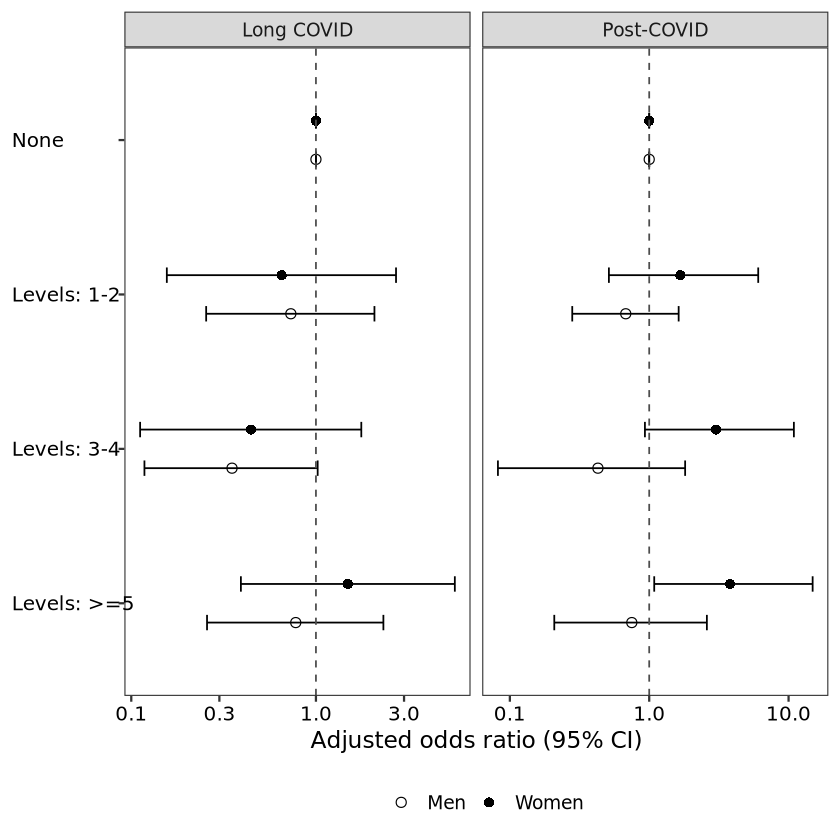

In [140]:
ggplot(all_sex_results_plot, aes(x = OR, y = fct_rev(term), shape = Condition)) +
  geom_point(position = position_dodge(width = 0.5), size = 2.5, color = "black") +
  geom_errorbarh(aes(xmin = CI_low, xmax = CI_high),
                 position = position_dodge(width = 0.5),
                 height = 0.2) +
  geom_vline(xintercept = 1, linetype = "dashed", color = "gray30") + 
  scale_shape_manual(values = c("Men" = 1, "Women" = 16)) +
  scale_x_log10() +
  theme_bw(base_size = 14) +
  labs(
    x = "Adjusted odds ratio (95% CI)",
    y = NULL,
    shape = "",
    color = NULL
  ) +
  theme(
    axis.text.y = element_text(size = 12, color = "black", hjust = 0),
    axis.text.x = element_text(size = 12, color = "black"),
    legend.position = "bottom",
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
#    strip.background = element_rect(fill = "grey90",color = "grey90",linewidth = 0.8),
#  strip.text = element_text(size = 14,color = "black")
  ) +
  facet_wrap(~ Timepoint, scales = "free_x")
ggsave("combinedForestPlot_bySex.tiff", width = 8, height = 7, dpi = 300)

## Female vs. Female (3-Monsths)

In [60]:
rlog_fem_rtn <- rlog_rtn %>%
  filter(SEX == "Feminino") %>%
  mutate(
    GROUP = factor(paste(CONDITION, SEX, sep = "_"), levels = c("NOBS_Feminino", "OBS_Feminino")),
    OUT = factor(ifelse(GROUP == "OBS_Feminino", 1, 0), levels = c(0,1)),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5"))) 
head(rlog_fem_rtn)

,CONDITION,SEX,CEFALEIA,TOSSE,DOR_CORPO,DISPNEIA,ALT_OLFATO,ALT_PALADAR,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,OBS,Feminino,1,1,1,0,1,1,1,1,1,0,0,8,>=5,OBS_Feminino,1
2,NOBS,Feminino,0,0,0,0,0,0,0,0,0,0,0,0,None,NOBS_Feminino,0
3,OBS,Feminino,1,0,1,0,0,0,1,0,1,0,0,4,3-4,OBS_Feminino,1
4,NOBS,Feminino,0,1,0,1,1,1,0,0,0,0,0,4,3-4,NOBS_Feminino,0
5,OBS,Feminino,0,0,0,1,0,1,0,0,0,0,0,2,1-2,OBS_Feminino,1
6,OBS,Feminino,0,0,0,1,0,0,0,0,0,0,0,1,1-2,OBS_Feminino,1


In [61]:
summary(glm(OUT ~ NIVEIS, data = rlog_fem_rtn, family = "binomial"))


Call:
glm(formula = OUT ~ NIVEIS, family = "binomial", data = rlog_fem_rtn)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  -0.7885     0.5394  -1.462   0.1438  
NIVEIS1-2     0.5140     0.6193   0.830   0.4065  
NIVEIS3-4     1.1021     0.6181   1.783   0.0746 .
NIVEIS>=5     1.3350     0.6591   2.025   0.0428 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 187.08  on 134  degrees of freedom
Residual deviance: 180.77  on 131  degrees of freedom
AIC: 188.77

Number of Fisher Scoring iterations: 4


## Male vs. Male (3-Months)

In [69]:
rlog_male_rtn <- rlog_rtn %>%
  filter(SEX == "Masculino") %>%
  mutate(
    GROUP = factor(paste(CONDITION, SEX, sep = "_"), levels = c("NOBS_Masculino", "OBS_Masculino")),
    OUT = factor(ifelse(GROUP == "OBS_Masculino", 1, 0), levels = c(0,1)),
    NIVEIS = factor(NIVEIS, levels = c("None", "1-2", "3-4", ">=5"))) 
head(rlog_male_rtn)

,CONDITION,SEX,CEFALEIA,TOSSE,DOR_CORPO,DISPNEIA,ALT_OLFATO,ALT_PALADAR,FADIGA,DOR_TORAC,ANOREXIA,DISFAGIA,DISFONIA,N_SINTOMAS,NIVEIS,GROUP,OUT
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>,<fct>,<fct>
1,NOBS,Masculino,0,0,0,1,0,0,0,1,0,0,0,2,1-2,NOBS_Masculino,0
2,NOBS,Masculino,1,0,1,0,0,0,1,1,0,0,0,4,3-4,NOBS_Masculino,0
3,OBS,Masculino,1,0,1,1,1,0,1,1,0,0,0,6,>=5,OBS_Masculino,1
4,NOBS,Masculino,0,0,0,0,0,0,0,0,0,0,0,0,None,NOBS_Masculino,0
5,OBS,Masculino,0,0,0,0,0,0,0,0,0,0,0,0,None,OBS_Masculino,1
6,OBS,Masculino,0,0,0,0,0,0,0,0,0,0,0,0,None,OBS_Masculino,1


In [70]:
summary(glm(OUT ~ NIVEIS, data = rlog_male_rtn, family = "binomial"))


Call:
glm(formula = OUT ~ NIVEIS, family = "binomial", data = rlog_male_rtn)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -1.297e-16  3.333e-01   0.000    1.000
NIVEIS1-2   -3.878e-01  4.466e-01  -0.868    0.385
NIVEIS3-4   -8.473e-01  7.664e-01  -1.106    0.269
NIVEIS>=5   -2.877e-01  6.346e-01  -0.453    0.650

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 146.22  on 106  degrees of freedom
Residual deviance: 144.67  on 103  degrees of freedom
AIC: 152.67

Number of Fisher Scoring iterations: 4


In [ ]:
model_sex_rtn <- function(x) {
    glm(OUT ~ NIVEIS, data = filter(rlog_male_rtn, SEX == x),
        family = binomial)
    }